___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum().any()

False

In [9]:
df.shape

(10000, 14)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [14]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

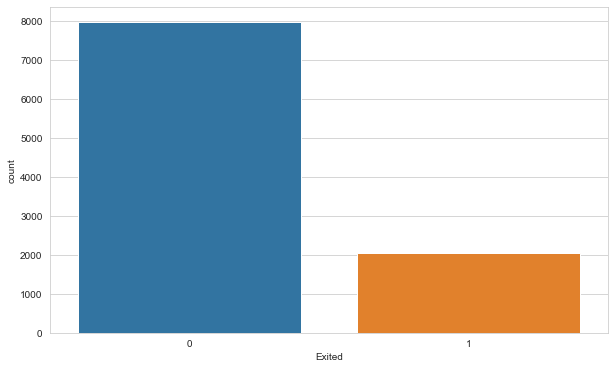

In [25]:
sns.countplot(df.Exited)

<AxesSubplot:>

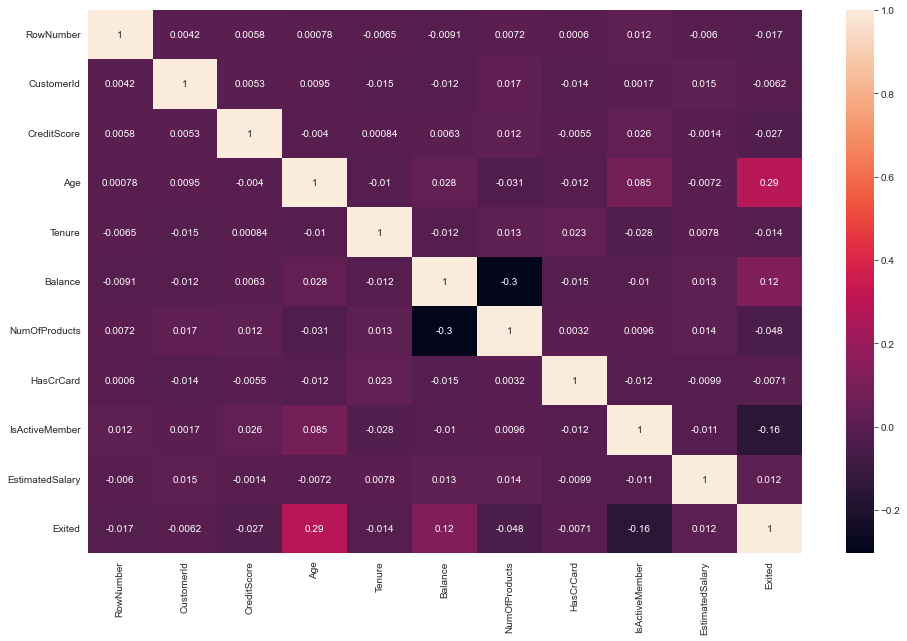

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot = True)

In [22]:
df = df.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [35]:
columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

<AxesSubplot:xlabel='Exited', ylabel='Age'>

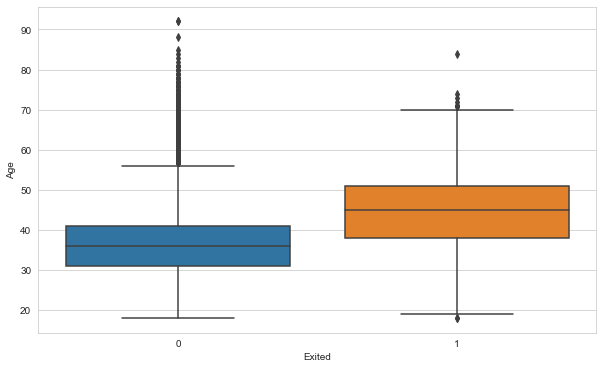

In [40]:
#sns.boxplot(x='Cover_Type',y=feature,data=df)
sns.boxplot(x= "Exited", y = "Age", data = df)

In [48]:
df.groupby("Gender")["Exited"].count()

Gender
Female    4543
Male      5457
Name: Exited, dtype: int64

In [52]:
df.shape

(10000, 11)

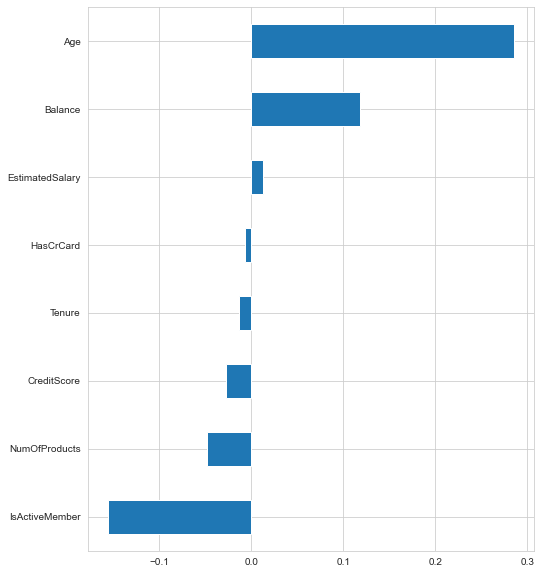

In [54]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [55]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


## Preprocessing of Data
- Train | Test Split, Scalling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [57]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [58]:
seed = 42

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [60]:
scaler = MinMaxScaler()

In [61]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [63]:
X_train.shape

(9000, 11)

In [64]:
X_test.shape

(1000, 11)

## Creating Model

## without class_weigth

In [80]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [81]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 250, verbose=1)

Epoch 1/250
254/254 [==============================] - 2s 3ms/step - loss: 0.5090 - recall: 0.0012 - val_loss: 0.4700 - val_recall: 0.0000e+00
Epoch 2/250
254/254 [==============================] - 1s 2ms/step - loss: 0.4666 - recall: 0.0000e+00 - val_loss: 0.4436 - val_recall: 0.0110
Epoch 3/250
254/254 [==============================] - 1s 2ms/step - loss: 0.4503 - recall: 0.0351 - val_loss: 0.4250 - val_recall: 0.0994
Epoch 4/250
254/254 [==============================] - 1s 2ms/step - loss: 0.4377 - recall: 0.1126 - val_loss: 0.4117 - val_recall: 0.2376
Epoch 5/250
254/254 [==============================] - 1s 2ms/step - loss: 0.4297 - recall: 0.1810 - val_loss: 0.4025 - val_recall: 0.1934
Epoch 6/250
254/254 [==============================] - 1s 2ms/step - loss: 0.4222 - recall: 0.1846 - val_loss: 0.3919 - val_recall: 0.2541
Epoch 7/250
254/254 [==============================] - 1s 2ms/step - loss: 0.4157 - recall: 0.2258 - val_loss: 0.3840 - val_recall: 0.2928
Epoch 8/250
254/254

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 14)                168       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.509,0.001,0.470,0.000
1,0.467,0.000,0.444,0.011
2,0.450,0.035,0.425,0.099
3,0.438,0.113,0.412,0.238
4,0.430,0.181,0.403,0.193


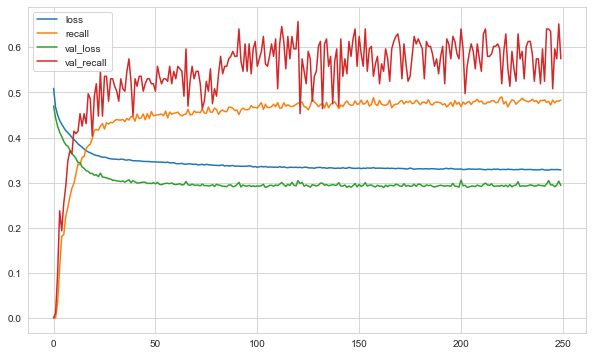

In [84]:
loss_df.plot();

In [85]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[765  31]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



### Creating Model

### with class_weigth

In [86]:
from sklearn.utils import class_weight
keys = np.unique(df["Exited"])
values = class_weight.compute_class_weight("balanced", keys, df["Exited"].values)
cw = dict(zip(keys, values))
cw

{0: 0.6279040562602034, 1: 2.454590083456063}

In [87]:
model.fit(x = X_train, y = y_train, class_weight=cw, validation_split = 0.1, batch_size = 32, epochs = 250, verbose = 1)

Epoch 1/250
254/254 [==============================] - 2s 4ms/step - loss: 0.4582 - recall: 0.7548 - val_loss: 0.4138 - val_recall: 0.8011
Epoch 2/250
254/254 [==============================] - 1s 4ms/step - loss: 0.4475 - recall: 0.7736 - val_loss: 0.3936 - val_recall: 0.8011
Epoch 3/250
254/254 [==============================] - 1s 4ms/step - loss: 0.4475 - recall: 0.7724 - val_loss: 0.3942 - val_recall: 0.8122
Epoch 4/250
254/254 [==============================] - 1s 4ms/step - loss: 0.4468 - recall: 0.7785 - val_loss: 0.4256 - val_recall: 0.8122
Epoch 5/250
254/254 [==============================] - 1s 4ms/step - loss: 0.4468 - recall: 0.7815 - val_loss: 0.4015 - val_recall: 0.8066
Epoch 6/250
254/254 [==============================] - 1s 4ms/step - loss: 0.4468 - recall: 0.7760 - val_loss: 0.4107 - val_recall: 0.8122
Epoch 7/250
254/254 [==============================] - 1s 4ms/step - loss: 0.4457 - recall: 0.7772 - val_loss: 0.3829 - val_recall: 0.7901
Epoch 8/250
254/254 [======

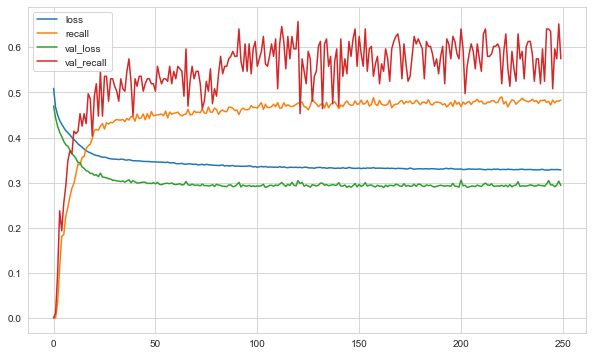

In [88]:
loss_df.plot();

In [89]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[645 151]
 [ 60 144]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.49      0.71      0.58       204

    accuracy                           0.79      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.83      0.79      0.80      1000



## GridSearchCV

In [97]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [94]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dense(units = 7, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [95]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "auto", verbose = 1, patience = 15)

In [99]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train,class_weight=cw, callbacks = [early_stop])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
254/254 [==============================] - 2s 4ms/step - loss: 0.6286 - recall: 0.6320 - val_loss: 0.5337 - val_recall: 0.6851
Epoch 2/200
254/254 [==============================] - 1s 2ms/step - loss: 0.5712 - recall: 0.7022 - val_loss: 0.5931 - val_recall: 0.8232
Epoch 3/200
254/254 [==============================] - 1s 3ms/step - loss: 0.5513 - recall: 0.7179 - val_loss: 0.5413 - val_recall: 0.8287
Epoch 4/200
254/254 [==============================] - 1s 3ms/step - loss: 0.5365 - recall: 0.7373 - val_loss: 0.5402 - val_recall: 0.8232
Epoch 5/200
254/254 [==============================] - 1s 3ms/step - loss: 0.5211 - recall: 0.7446 - val_loss: 0.3566 - val_recall: 0.4917
Epoch 6/200
254/254 [==============================] - 1s 3ms/step - loss: 0.5187 - recall: 0.7439 - val_loss: 0.3794 - val_recall: 0.6961
Epoch 7/200
254/254 [==============================] - 1s 3ms/step - loss: 0.5145 - recall: 0.7518 - val

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002C14A861550>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [100]:
grid_model.best_score_

0.7846887470618652

In [101]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [102]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[624 172]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       796
           1       0.47      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___